# Aprendizado por reforço

## Importar conjunto de dados

In [ ]:
import numpy as np

base = np.zeros((7, 6))

ambiente = np.matrix([
    [-1, -1, -1, -1, -5,    -1],
    [-1, -1, -1, -1, -10, 1000],
    [-1, -1, -1, -1, -10,   -1],
    [-1, -2, -1, -1, -5,    -1],
    [-1, -5, -1, -1, -2,   100],
    [-1, -2, -1, -1, -1, 10000],
    [-1, -1, -1, -1, -5,    -5],
])

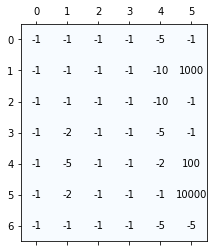

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.matshow(base, cmap=plt.cm.Blues)

for i in range(6):
    for j in range(7):
        c = ambiente[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

## Criando classes


In [ ]:
from random import randint

class EpsilonGreedy:

    def __init__(self, initial_epsilon=1.0, min_epsilon=0.0, decay=0.999):
        self.initial_epsilon = initial_epsilon
        self.epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.decay = decay

    def choose(self, q_table, state, action_space):
        if np.random.rand() < self.epsilon or sum(q_table[state]) == 0:
            action = randint(0, len(action_space) - 1)
        else:
            try:
                action = np.argmax(q_table[state])
            except:
                action = randint(0, len(action_space) - 1)

        self.epsilon = round(self.epsilon * self.decay, 10)

        return action
    
class FixedValue:
    def __init__(self, value=1.0):
        self.value = value
    
    def choose(self, q_table, state, action_space):
        if np.random.rand() <= self.value:
            action = randint(0, len(action_space) - 1)
        else:
            action = np.argmax(q_table[state])

        return action
    

class QLAgent:
    def __init__(self, action_space, alpha=0.5, gamma=0.8, exploration_strategy=None):
        self.position = (0,0)
        
        self.state = self.state_representation()
        self.action_space = action_space
        self.action = 0
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = {self.state: [0] * len(self.action_space)}
        self.exploration = exploration_strategy


    def state_representation(self):
       return str(self.position[0]) + str(self.position[1])

    def escolher_acao(self):
        return self.exploration.choose(self.q_table, self.state, self.action_space)
    
    def recompensa(self):
        return ambiente[self.position]
    
    def move_agent(self):
        x, y = self.position
        acao = self.action_space[self.action]
        
        if (acao == 'up' and x != 0):
            x -= 1
        elif(acao == 'down' and x != ambiente.shape[0]-1):
            x += 1
        elif(acao == 'left' and y != 0):
            y -= 1
        elif (acao == 'right' and y != ambiente.shape[1]-1):
            y += 1

        self.position = (x, y)
            
    def end_epsodio(self):
        if self.position in [(1,5), (4,5), (5,5)]:
            return False
        else:
            return True
    
    def new_epsodio(self):
        self.position = (0, 0)
        
    def learn(self, v=False):
        
        self.state = self.state_representation()

        if self.state not in self.q_table:
            self.q_table[self.state] = [0] * len(self.action_space)
    
        p = self.position    
        self.action = self.escolher_acao()
        self.move_agent()
        reward = ambiente[self.position]
        
        
        proximo_estado = self.state_representation()
        
        if proximo_estado in self.q_table:
            max_new_state = max(self.q_table[proximo_estado])
        else:
            self.q_table[self.state] = [0] * len(self.action_space)
            max_new_state = 0
                
        #                             Q(s, a) = (1 - alpha) * Q(s, a) + alpha(r + Y * Q(s+1, a))
        self.q_table[self.state][self.action] = (1 - self.alpha) * self.q_table[self.state][self.action] + self.alpha * (reward + self.gamma * max_new_state)

        if v:
            char = ''
            
            if self.action_space[self.action] == 'up':
                char = '^'
            elif self.action_space[self.action] == 'down':
                char = 'v'
            elif self.action_space[self.action] == 'left':
                char = '<'
            elif self.action_space[self.action] == 'right':
                char = '>'
            
            # caminho[p] = char
            caminho[p] = 1
        
        return self.end_epsodio()

agente = QLAgent(['up', 'down', 'left', 'right'], alpha=0.5, gamma=0.8, exploration_strategy=EpsilonGreedy())

## Iniciando aprendizado


In [ ]:
interacoes = 1000
end = True
caminho = base.copy()

for i in range(interacoes):
    while end:
        end = agente.learn()
    end = True
    agente.new_epsodio()

## Mostrar caminho aprendido

In [ ]:
while end:
    end = agente.learn(v = True)
end = agente.learn(v = True)

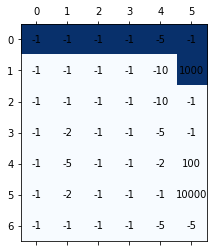

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.matshow(caminho, cmap=plt.cm.Blues)

for i in range(6):
    for j in range(7):
        c = ambiente[j,i]
        ax.text(i, j, str(c), va='center', ha='center')